In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Load and Explore Data

In [2]:
train_data = pd.read_csv('train.csv')

# Step 2: Check for missing values and handle them if needed

In [5]:
missing_values = train_data.isnull().sum()
print("Columns with missing values:")
print(missing_values[missing_values >0])

Columns with missing values:
Series([], dtype: int64)


# Step 3: Data Splitting

In [7]:
X = train_data.iloc[:, :-1]  # Features (excluding critical_temperature)
y = train_data['critical_temp']  # Target (critical temperature)



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Model Selection (Linear Regression)

In [8]:
model=LinearRegression()

# step 5: Model Training

In [9]:
model.fit(X_train,y_train)

LinearRegression()

# Step 6: Model Evaluation (Validation Set)

In [10]:
y_pred_test = model.predict(X_test)

mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)

print("\nTest MAE:", mae_test)
print("Test MSE:", mse_test)
print("Test RMSE:", rmse_test)
print("Test R-squared:", r2_test)


Test MAE: 13.424386657891977
Test MSE: 315.54230239297004
Test RMSE: 17.763510418635445
Test R-squared: 0.7281437989396653


In [16]:
y_pred_test = model.predict(X_test)

# Print the predicted critical temperatures
print("Predicted Critical Temperatures:")
print(y_pred_test)

# Optionally, you can add the predicted values as a new column in your test data
X_test_with_predictions = X_test.copy()
X_test_with_predictions['Predicted_Critical_Temperature'] = y_pred_test

# Save the test data with predictions to a CSV file if needed
X_test_with_predictions.to_csv('test_data_with_predictions.csv', index=False)


Predicted Critical Temperatures:
[ 3.97082872 79.33042649 59.16743731 ...  7.17444666 -4.89634155
 67.5914616 ]


# Step 7: Interpretation (Feature Importance)

In [12]:
# Get the coefficients (importance) of each feature in the model
feature_importance = model.coef_

# Create a DataFrame to display feature names and their corresponding coefficients
feature_names = X.columns  # Assuming X is your feature DataFrame
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': feature_importance})

# Sort the coefficients by absolute value to see the most influential features
coefficients_df['Abs_Coefficient'] = np.abs(coefficients_df['Coefficient'])
sorted_coefficients_df = coefficients_df.sort_values(by='Abs_Coefficient', ascending=False)

# Print the top N most important features
top_n = 10  # You can change this to the desired number of top features to display
print(f"Top {top_n} Most Important Features:")
print(sorted_coefficients_df.head(top_n))

Top 10 Most Important Features:
                      Feature  Coefficient  Abs_Coefficient
15                entropy_fie   -86.547953        86.547953
75            entropy_Valence    70.536564        70.536564
76        wtd_entropy_Valence   -65.397983        65.397983
25      entropy_atomic_radius    52.538134        52.538134
26  wtd_entropy_atomic_radius    42.208646        42.208646
16            wtd_entropy_fie    38.746711        38.746711
5         entropy_atomic_mass   -36.294108        36.294108
74          wtd_gmean_Valence   -28.338338        28.338338
56     wtd_entropy_FusionHeat    25.990102        25.990102
72           wtd_mean_Valence    25.046204        25.046204


C:\Users\Sakshi\AppData\Local\Temp\ipykernel_37932\322760014.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.barh(sorted_coefficients_df['Feature'][:top_n], sorted_coefficients_df['Coefficient'][:top_n])


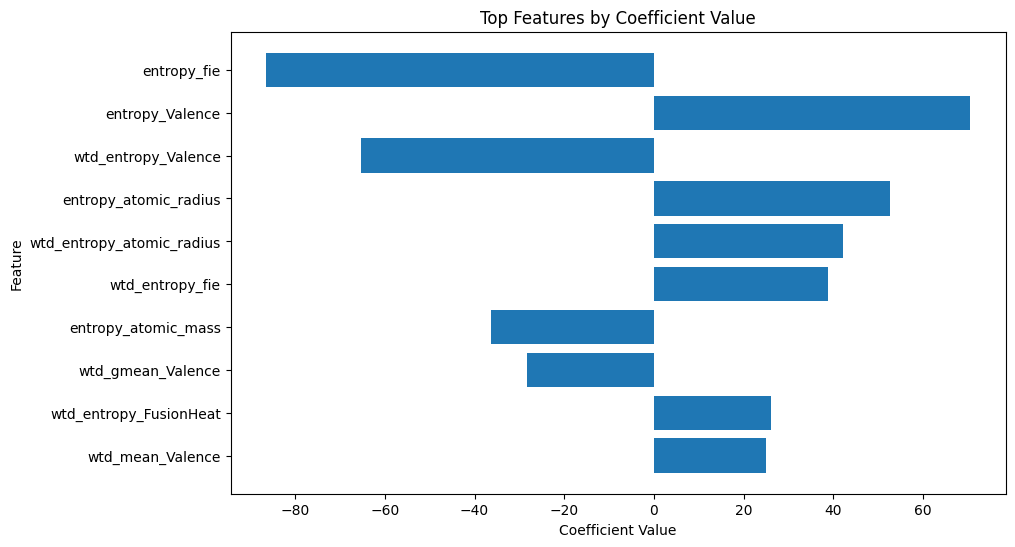

In [13]:
plt.figure(figsize=(10, 6))
plt.barh(sorted_coefficients_df['Feature'][:top_n], sorted_coefficients_df['Coefficient'][:top_n])
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Top Features by Coefficient Value')
plt.gca().invert_yaxis()  # Invert the y-axis for better visualization of top features
plt.show()

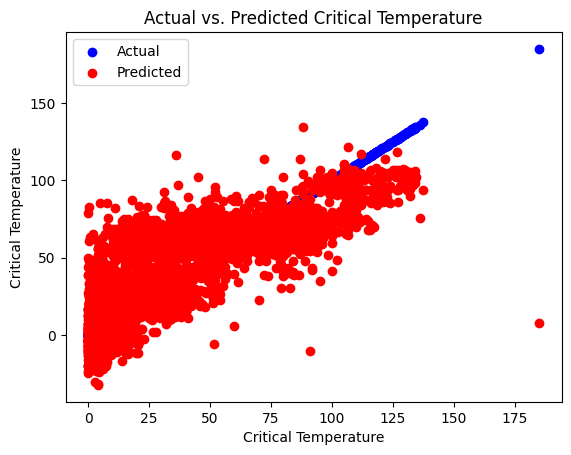

In [17]:
plt.scatter(y_test, y_test, color='blue', label='Actual')  # Actual values in blue
plt.scatter(y_test, y_pred_test, color='red', label='Predicted')  # Predicted values in red
plt.xlabel("Critical Temperature")
plt.ylabel("Critical Temperature")
plt.title("Actual vs. Predicted Critical Temperature")
plt.legend()
plt.show()